In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Load and preview the dataset

In [5]:
df=pd.read_csv("Hotel Reservations.csv")
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Cancelled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Cancelled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Cancelled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Cancelled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Complementary,0,0,0,94.50,0,Cancelled


In [30]:
df.shape
print(f'The Hotel Reservations Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The Hotel Reservations Dataset has 1499 rows and 19 columns.


In [29]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

## Handle missing values

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            1499 non-null   object 
 1   no_of_adults                          1499 non-null   int64  
 2   no_of_children                        1499 non-null   int64  
 3   no_of_weekend_nights                  1499 non-null   int64  
 4   no_of_week_nights                     1499 non-null   int64  
 5   type_of_meal_plan                     1499 non-null   object 
 6   required_car_parking_space            1499 non-null   int64  
 7   room_type_reserved                    1499 non-null   object 
 8   lead_time                             1499 non-null   int64  
 9   arrival_year                          1499 non-null   int64  
 10  arrival_month                         1499 non-null   int64  
 11  arrival_date     

#### Since there is No Null Value data so there is no need of removing any missing value this data is prefect for our analytics process

In [27]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,1.858572,0.092061,0.815877,2.187458,0.034023,81.241494,2017.811875,7.249500,15.392929,0.023349,0.013342,0.088059,102.975450,0.639093
std,0.508944,0.364748,0.874342,1.379887,0.181348,82.683903,0.390943,3.040743,8.780119,0.151059,0.174727,0.916536,34.414027,0.778443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,18.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,81.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,56.000000,2018.000000,8.000000,15.000000,0.000000,0.000000,0.000000,100.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,116.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,2.000000,6.000000,15.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,3.000000,19.000000,259.200000,4.000000


## Understand which variables are categorical and which are numerical.

In [25]:
df.select_dtypes(include='object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Cancelled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Cancelled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Cancelled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Cancelled
4,INN00005,Not Selected,Room_Type 1,Complementary,Cancelled
...,...,...,...,...,...
1494,INN01495,Meal Plan 1,Room_Type 1,Offline,Not_Cancelled
1495,INN01496,Meal Plan 1,Room_Type 1,Online,Cancelled
1496,INN01497,Meal Plan 1,Room_Type 4,Aviation,Cancelled
1497,INN01498,Meal Plan 1,Room_Type 4,Online,Not_Cancelled


In [26]:
df.select_dtypes(include='number')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2,0,2,1,0,221,2017,10,10,0,0,0,65.00,0
1495,2,0,1,0,0,52,2018,9,4,0,0,0,98.82,0
1496,1,0,0,1,0,20,2018,5,26,0,0,0,110.00,0
1497,1,0,1,2,0,109,2018,5,2,0,0,0,88.01,1


## Check Unique Values

In [24]:
df_unique = df.drop_duplicates()
df_unique

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Cancelled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Cancelled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Cancelled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Cancelled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Complementary,0,0,0,94.50,0,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,INN01495,2,0,2,1,Meal Plan 1,0,Room_Type 1,221,2017,10,10,Offline,0,0,0,65.00,0,Not_Cancelled
1495,INN01496,2,0,1,0,Meal Plan 1,0,Room_Type 1,52,2018,9,4,Online,0,0,0,98.82,0,Cancelled
1496,INN01497,1,0,0,1,Meal Plan 1,0,Room_Type 4,20,2018,5,26,Aviation,0,0,0,110.00,0,Cancelled
1497,INN01498,1,0,1,2,Meal Plan 1,0,Room_Type 4,109,2018,5,2,Online,0,0,0,88.01,1,Not_Cancelled


### Average value per category

In [23]:
result = df.groupby('type_of_meal_plan')['avg_price_per_room'].mean().reset_index()
result

,type_of_meal_plan,avg_price_per_room
0,Meal Plan 1,103.835461
1,Meal Plan 2,110.015800
2,Not Selected,94.282845


### Total count per group

In [22]:
df["booking_status"].value_counts()

booking_status
Not_Cancelled    1040
Cancelled         459
Name: count, dtype: int64

### Revenue by category

In [21]:
dataset=df.groupby('room_type_reserved')['avg_price_per_room'].sum().reset_index()
dataset

,room_type_reserved,avg_price_per_room
0,Room_Type 1,111974.26
1,Room_Type 2,1745.87
2,Room_Type 4,32178.84
3,Room_Type 5,1281.96
4,Room_Type 6,6025.79
5,Room_Type 7,1153.48


### Average rating by customer type

In [20]:
Item=df.groupby('market_segment_type')['repeated_guest'].mean()*100
Item

market_segment_type
Aviation          0.000000
Complementary    28.125000
Corporate        27.027027
Offline           1.294498
Online            0.185701
Name: repeated_guest, dtype: float64

### Create a pivot table to show:Monthly trends

In [19]:
pivot_monthly = pd.pivot_table(df,index="arrival_month",values="booking_status",aggfunc="count")
print(pivot_monthly)

               booking_status
arrival_month                
1                          34
2                          68
3                         113
4                         130
5                         124
6                         150
7                         113
8                         148
9                         188
10                        205
11                        111
12                        115


### Booking status = Not Canceled and Average price per room > 100

In [17]:
df.query("booking_status == 'Not_Cancelled' and avg_price_per_room > 100")

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Cancelled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Cancelled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Cancelled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Cancelled
11,INN00012,1,0,2,1,Meal Plan 1,0,Room_Type 4,35,2018,4,30,Online,0,0,0,140.40,1,Not_Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,INN01480,1,0,1,0,Meal Plan 1,0,Room_Type 1,3,2018,6,13,Offline,0,0,0,106.00,0,Not_Cancelled
1483,INN01484,2,0,0,3,Meal Plan 1,1,Room_Type 1,22,2018,10,25,Online,0,0,0,139.00,1,Not_Cancelled
1484,INN01485,2,0,1,1,Meal Plan 1,0,Room_Type 1,4,2017,9,12,Online,0,0,0,128.50,2,Not_Cancelled
1486,INN01487,2,2,2,4,Meal Plan 1,0,Room_Type 6,20,2018,11,11,Online,0,0,0,196.67,4,Not_Cancelled


### Long Lead Time AND Repeated Guests

In [16]:
df.query("lead_time > 50 and repeated_guest == 1")

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
302,INN00303,2,0,2,1,Meal Plan 1,0,Room_Type 1,68,2018,1,2,Offline,1,1,0,63.0,1,Not_Cancelled
321,INN00322,1,0,1,0,Meal Plan 1,0,Room_Type 1,51,2018,5,22,Corporate,1,0,3,65.0,0,Not_Cancelled
605,INN00606,1,0,0,2,Meal Plan 1,0,Room_Type 1,91,2018,9,14,Corporate,1,1,2,65.0,0,Not_Cancelled
776,INN00777,1,0,0,3,Meal Plan 1,0,Room_Type 1,91,2018,9,14,Corporate,1,3,15,65.0,0,Not_Cancelled
800,INN00801,1,0,0,1,Meal Plan 1,0,Room_Type 1,105,2018,9,28,Corporate,1,3,17,65.0,0,Not_Cancelled


#### Repeat guests with long lead times represent a highly loyal and reliable customer segment that enables better demand forecasting and stable revenue planning.

### Detecting outliers of Average price per room

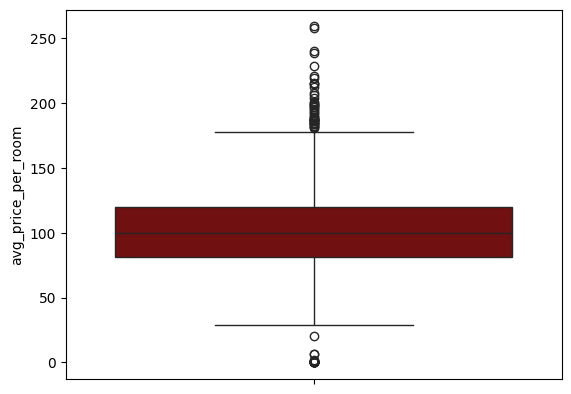

In [10]:
sns.boxplot(y=df['avg_price_per_room'],color='maroon')
plt.show()

In [11]:
import statistics as st

# Total records before removing outliers
print("Total number of records =", len(df))

# Quartiles
quant = st.quantiles(df['avg_price_per_room'])
Q1 = quant[0]
Q3 = quant[2]

# IQR
IQR = Q3 - Q1

# Limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifying outliers
lower_outliers = df[df['avg_price_per_room'] < lower_limit]
upper_outliers = df[df['avg_price_per_room'] > upper_limit]

print("Total number of lower outliers =", lower_outliers.shape[0])
print("Total number of upper outliers =", upper_outliers.shape[0])

# Removing outliers
actual_data = df[
    (df['avg_price_per_room'] >= lower_limit) &
    (df['avg_price_per_room'] <= upper_limit)
]

print("Total number of records without outliers =", actual_data.shape[0])


Total number of records = 1499
Total number of lower outliers = 32
Total number of upper outliers = 46
Total number of records without outliers = 1421


### Line chart of Average price trend over time

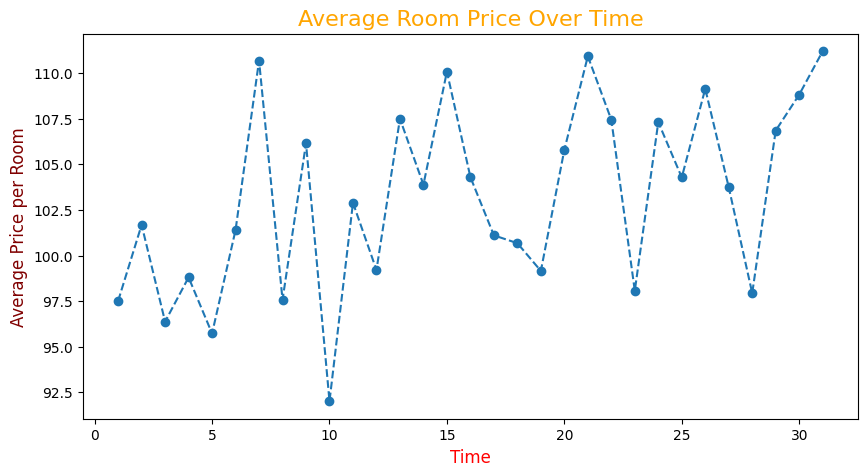

In [9]:
price_trend = df.groupby('arrival_date')['avg_price_per_room'].mean()
plt.figure(figsize=(10,5))
plt.plot(price_trend.index, price_trend.values, marker='o', linestyle='--')
plt.xlabel("Time",color='red',size=12)
plt.ylabel("Average Price per Room",color='maroon',size=12)
plt.title("Average Room Price Over Time",color='orange',size=16)
plt.show()


### Distribution of Room Prices

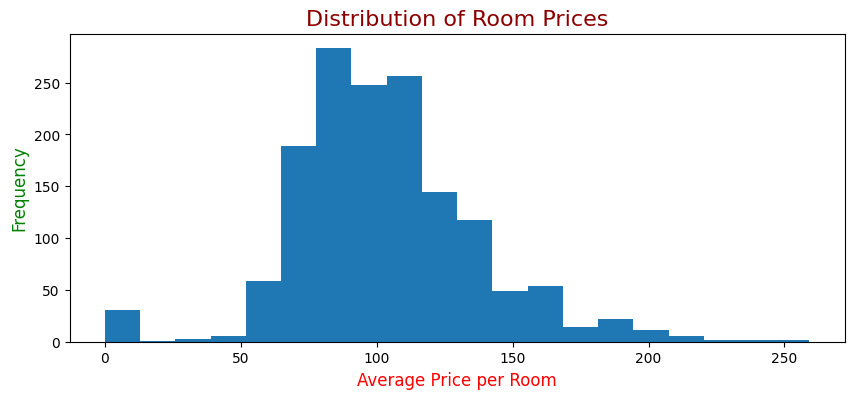

In [8]:
plt.figure(figsize=(10,4))
plt.hist(df['avg_price_per_room'], bins=20)
plt.xlabel("Average Price per Room",color='red',size=12)
plt.ylabel("Frequency",color='green',size=12)
plt.title("Distribution of Room Prices",color='darkred',size=16)
plt.show()

### countplot for categorical analysis

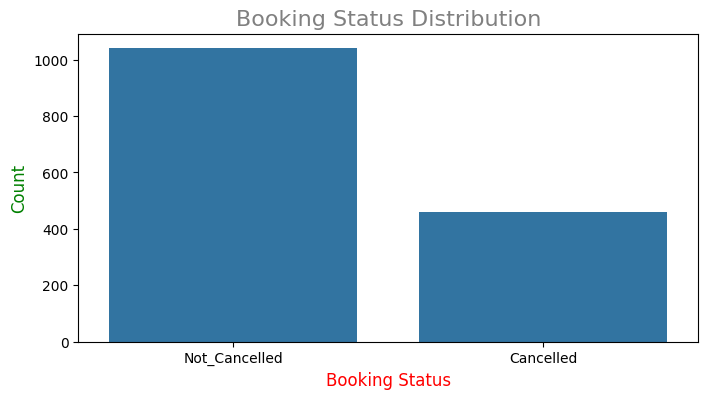

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x='booking_status',data=df)
plt.xlabel("Booking Status",color='red',size=12)
plt.ylabel("Count",color='green',size=12)
plt.title("Booking Status Distribution",color='grey',size=16)
plt.show()

### Does Avg price per room spending vary significantly?

F-statistic: 98.62056437345085
P-value: 1.5120385337098723e-74


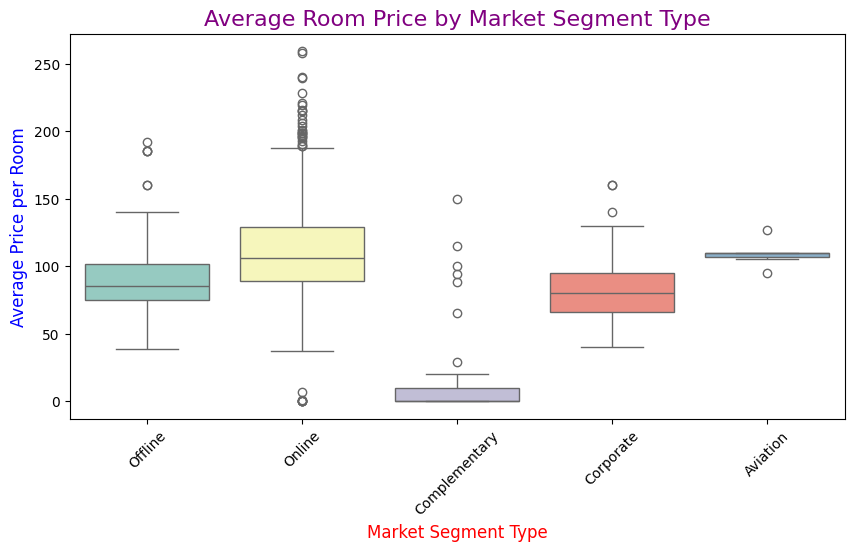

In [6]:
groups = [group["avg_price_per_room"].dropna() 
          for booking_status, group in df.groupby("market_segment_type")]

f_stat, p_value = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room', palette='Set3')
plt.xticks(rotation=45)
plt.xlabel("Market Segment Type",color='red',size=12)
plt.ylabel("Average Price per Room",color='blue',size=12)
plt.title("Average Room Price by Market Segment Type",color="purple",size=16)
plt.show()